# Kellie Heckman
# Lab 3 - Exploring and manipulating data.
Here is what we will do:
1. Prepare the data
2. Train 3 models
 - Decision Tree
 - SVM using rgb
 - Neural Net
3. Get model performance on train and test sets
4. Create appropriate graphs

### Prepare the data

In [5]:
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")
howell_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB


### A Better Plot

In [2]:
#import matplotlib.pyplot as plt
#height = howell_full['height']
#weight = howell_full['weight']
#gender = howell_full['male']
#age = howell_full['age']

#plt.scatter(height, weight, c=gender)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

#plt.scatter(height, age, c=gender)
#plt.xlabel('height (cm)')
#plt.ylabel('age')
#plt.show()

In [8]:
# create a new feature with the name new
howell_full['new'] = howell_full['male'] + howell_full['age']
howell_full.info()

# get rid of the new feature
howell_full.drop(axis='columns', labels='new', inplace=True)
howell_full.info()

# remove rows that are missing values
howell_full.dropna(axis='index', how="any", inplace=True)

height_median = howell_full['height'].median()
weight_average = howell_full['weight'].mean()

# replace missing values by median or average (or any arbitrary value)
howell_full['height'].fillna(height_median, inplace=True)
howell_full['weight'].fillna(weight_average, inplace=True)
howell_full.info()

def bmi(height, weight):
 return 10000*weight/(height**2)
    

new_feature = bmi(howell_full['height'], howell_full['weight'])
howell_full['bmi'] = new_feature
howell_full.head(n=10)

import numpy as np
def bmi_category(bmi):
 # bmi can only be a single value
 if bmi < 18.5: return 'Underweight'
 if bmi < 25.0: return 'Normal'
 if bmi < 30.0: return 'Overweight'
 return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
howell_full['bmi class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   bmi     544 non-null    float64
 5   new     544 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 25.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
 4   bmi     544 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 21.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dt

bmi class
Underweight    341
Normal         202
Overweight       1
Name: count, dtype: int64

### Splitting the Data by Age

In [9]:
over18 = howell_full["age"] > 18
#print(over18)

# Only keep the true instances
howell_adults = howell_full[over18]
howell_children = howell_full[~over18] # ~ is not in numpy
#print("There are ", len(howell_adults), " adult instances")
#print(howell_adults)

#print("There are ", len(howell_children), " child instances")
#print(howell_children)

### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

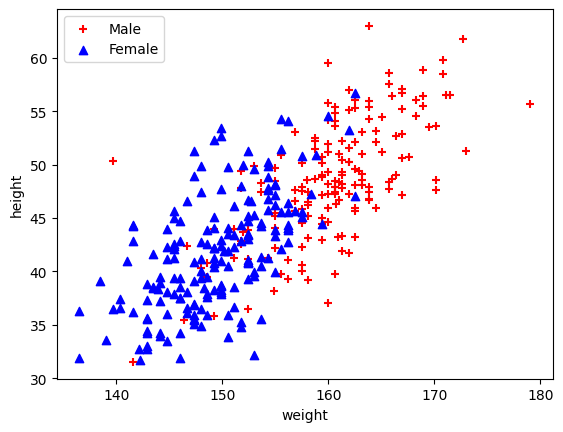

In [19]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, howell_adults['height'])
weight = howell_adults['weight']

plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()

In [23]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

### Stratified Test/Train Data Split

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
 random_state=123)
for train_indices, test_indices in splitter.split(howell_adults,
howell_adults['male']):
 train_set = howell_adults.iloc[train_indices]
 test_set = howell_adults.iloc[test_indices]

print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  276 Test size:  70


In [12]:
### train and evaluate a Linear Regression Model

Results for decision tree on training data
  Default settings
Confusion Matrix
[[145   0]
 [  0 131]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0
Results for decision tree on test data
 Default settings
Confusion Matrix
[[28  9]
 [11 22]]
Accuracy is  0.7142857142857143
Precision is  0.7096774193548387
Recall is  0.6666666666666666
F1 is  0.6875


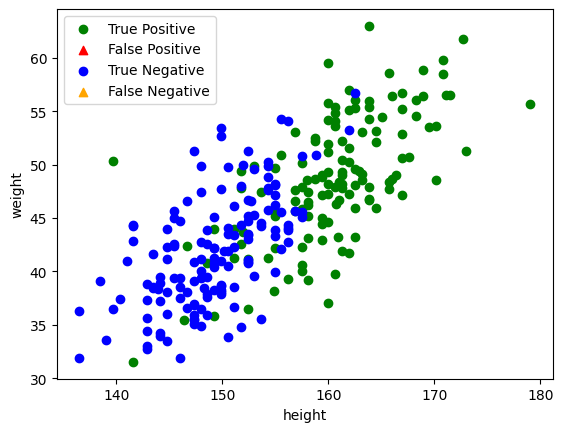

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

#X = train_set[['height']]
#X = train_set[['weight']]
X = train_set[['height', 'weight']]
y = train_set['male']

#X_test = test_set[['height']]
#X_test = test_set[['weight']]
X_test = test_set[['height', 'weight']]
y_test = test_set['male']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is    ', recall_score(y, y_pred))
print('F1 is        ', f1_score(y, y_pred))    

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

plot2FeatureBinaryConfusion(train_set, 'height','weight','male',y_pred)

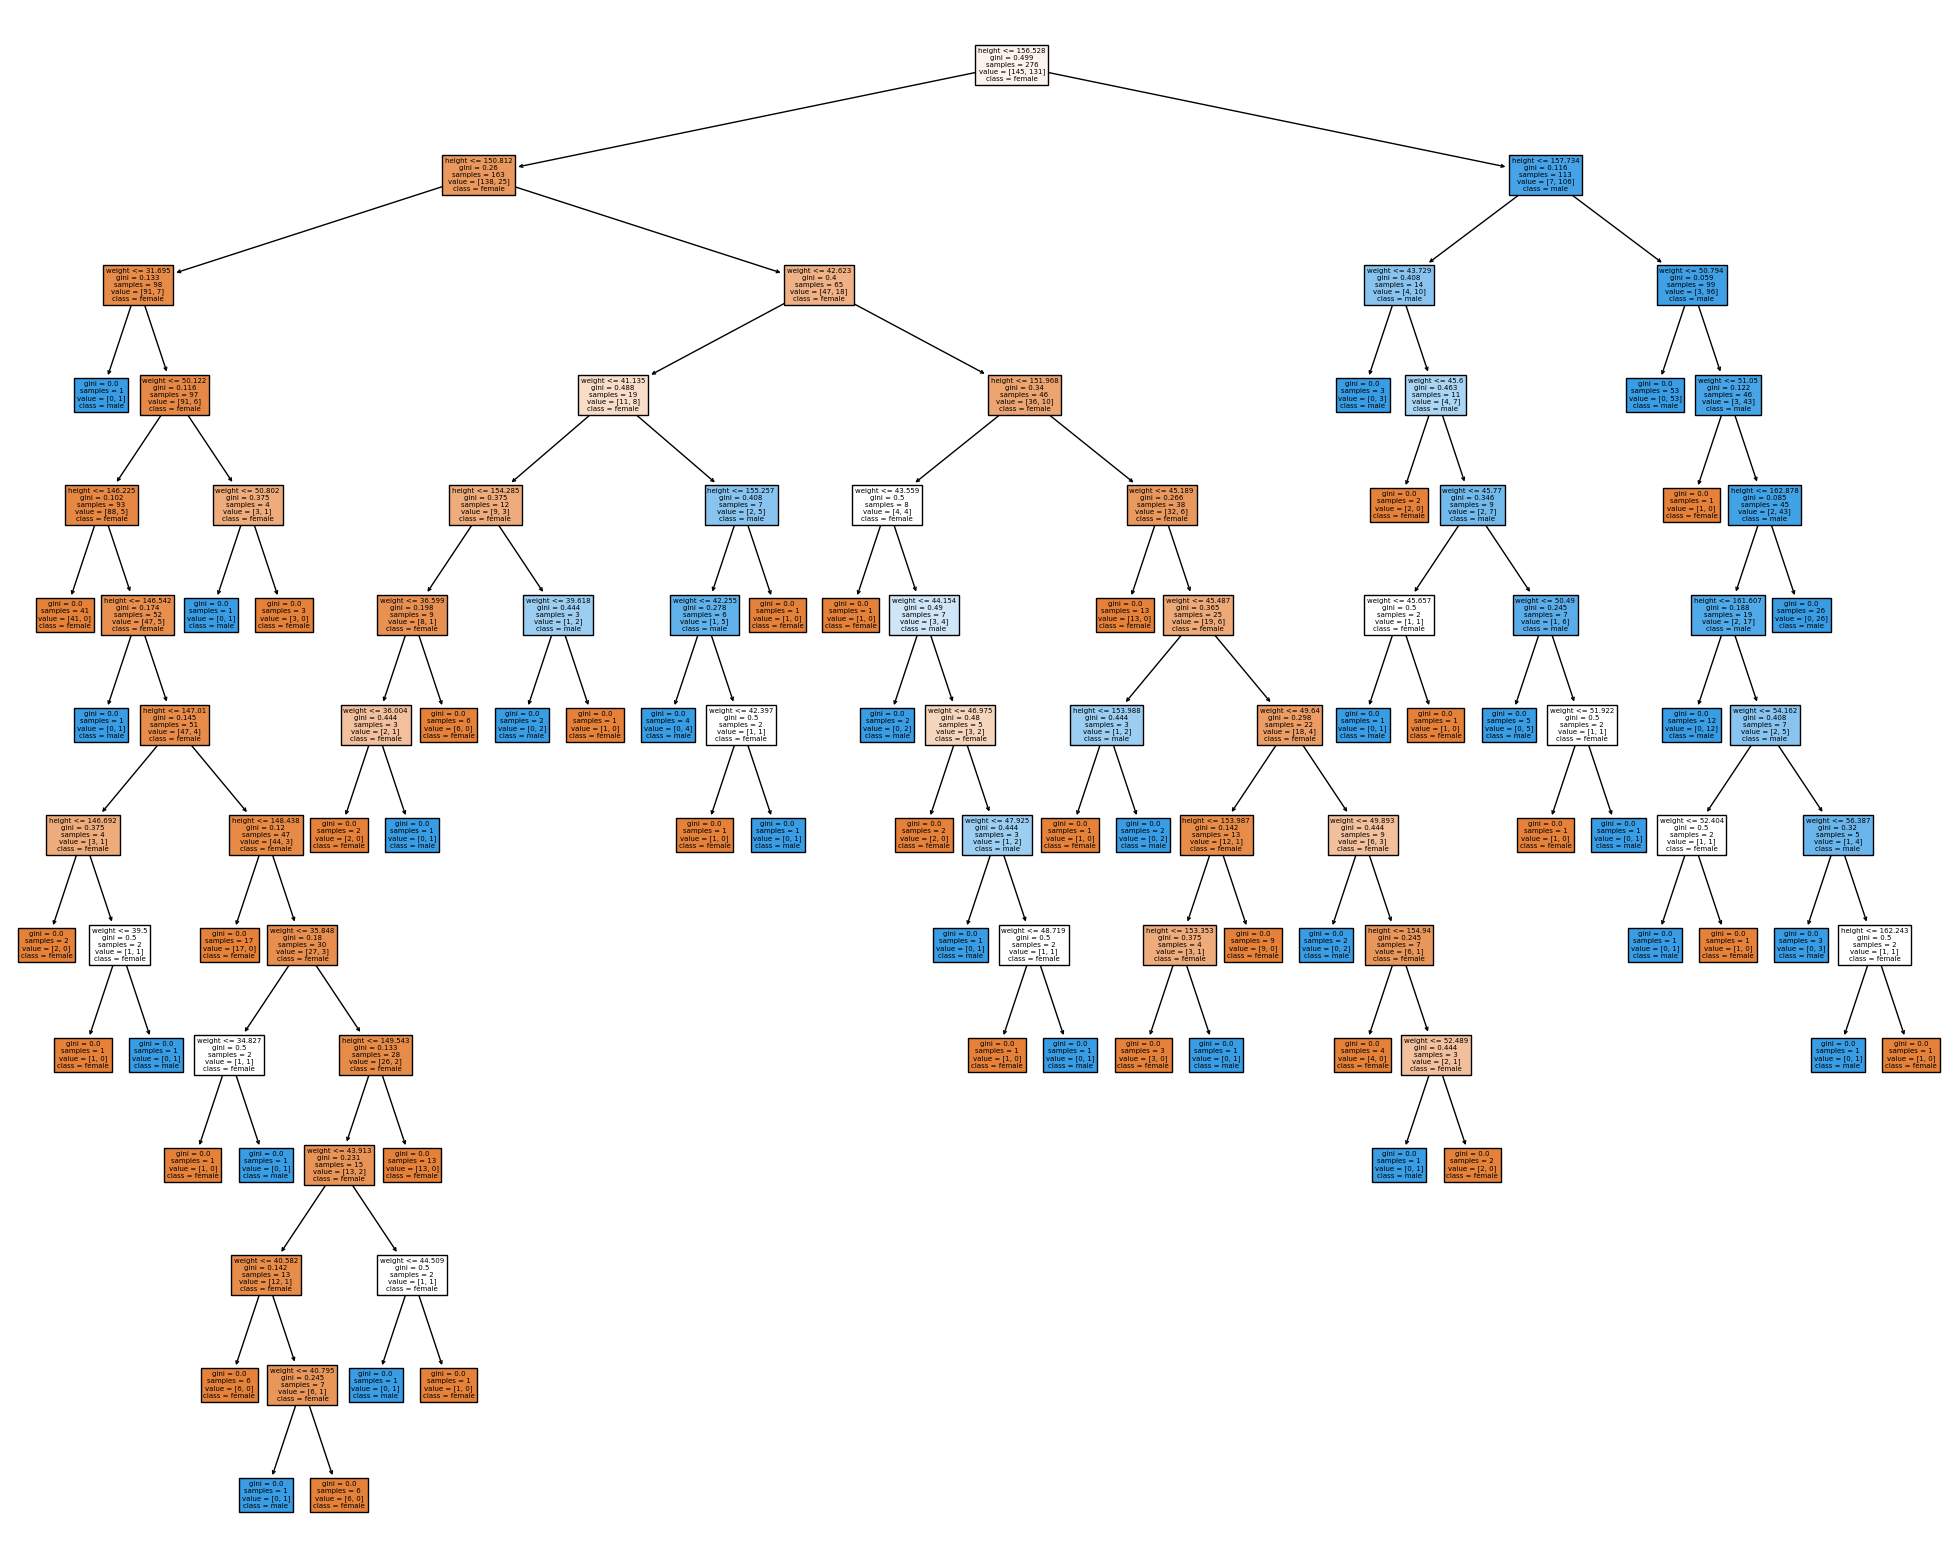

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
plot_tree(tree_model, feature_names=['height', 'weight'], class_names=['female', 'male'], filled=True)
fig.savefig("decision_tree_howell.png")                  

In [12]:
### train and evaluate a SVC Model

Results for svc training data
  Default settings
Confusion Matrix
[[126  19]
 [ 23 108]]
Accuracy is   0.8478260869565217
Precision is  0.8503937007874016
Recall is     0.8244274809160306
F1 is         0.8372093023255814
Results for svc on test data
 Default settings
Confusion Matrix
[[29  8]
 [ 8 25]]
Accuracy is  0.7714285714285715
Precision is  0.7575757575757576
Recall is  0.7575757575757576
F1 is  0.7575757575757576


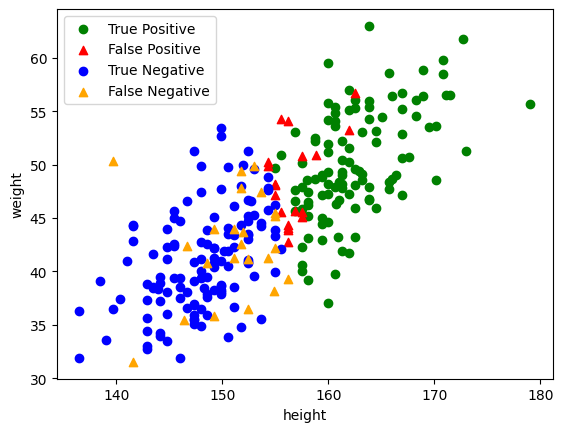

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

#X = train_set[['height']]
#X = train_set[['weight']]
X = train_set[['height', 'weight']]
y = train_set['male']

#X_test = test_set[['height']]
#X_test = test_set[['weight']]
X_test = test_set[['height', 'weight']]
y_test = test_set['male']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is    ', recall_score(y, y_pred))
print('F1 is        ', f1_score(y, y_pred))    

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

plot2FeatureBinaryConfusion(train_set, 'height','weight','male',y_pred)

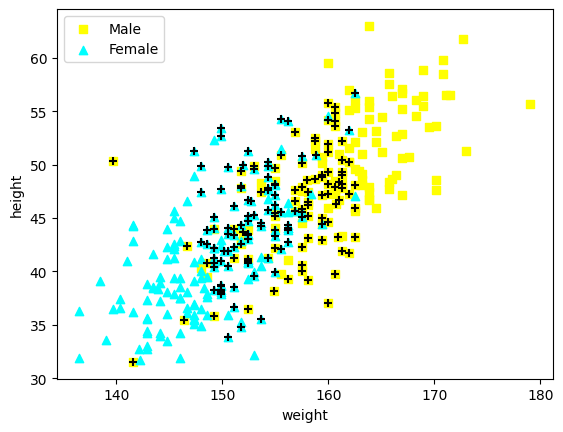

In [31]:
import matplotlib.pyplot as plt
male_height = np.ma.masked_where(howell_adults['male']==0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, howell_adults['height'])
weight = howell_adults['weight']

# get the values for the support vectors (the special instances)
support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]

plt.scatter(male_height, weight, c='yellow', marker='s')
plt.scatter(female_height, weight, c='cyan', marker='^')
plt.scatter(support_x, support_y, c='black', marker='+')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()



In [12]:
### train and evaluate a Neural Net Model

Results for nn training data
  Default settings
Confusion Matrix
[[120  25]
 [ 34  97]]
Accuracy is   0.7862318840579711
Precision is  0.7950819672131147
Recall is     0.7404580152671756
F1 is         0.766798418972332
Results for nn on test data
 Default settings
Confusion Matrix
[[30  7]
 [10 23]]
Accuracy is  0.7571428571428571
Precision is  0.7666666666666667
Recall is  0.696969696969697
F1 is  0.7301587301587302


C:\Users\krh52\Anaconda\ds-venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


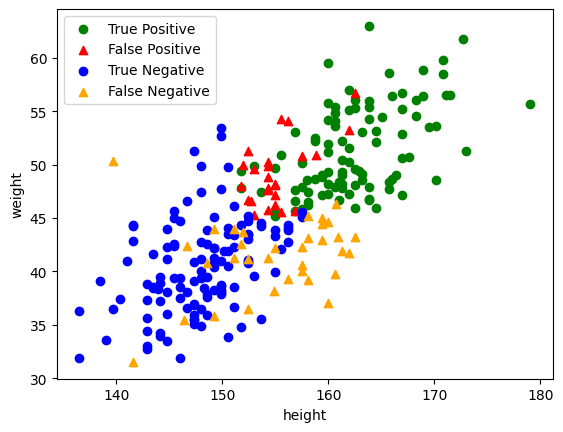

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

#X = train_set[['height']]
#X = train_set[['weight']]
X = train_set[['height', 'weight']]
y = train_set['male']

#X_test = test_set[['height']]
#X_test = test_set[['weight']]
X_test = test_set[['height', 'weight']]
y_test = test_set['male']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)
print('Results for nn training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred))
print('Recall is    ', recall_score(y, y_pred))
print('F1 is        ', f1_score(y, y_pred))    

y_test_pred = nn_model.predict(X_test)
print('Results for nn on test data')
print(' Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred))
print('Recall is ', recall_score(y_test,y_test_pred))
print('F1 is ', f1_score(y_test, y_test_pred))

plot2FeatureBinaryConfusion(train_set, 'height','weight','male',y_pred)

# Results
Basic results for out classification model to predict gender on the Howell data.
| Model | Training Features | Set | Accuracy | F1 |
|:---|:---|:---|:---|:---|
|Decision Tree|Height|Training|89.85|88|.6
|Decision Tree|Height|Test|81.43|78.69|
|Decision Tree|Weight|Training|96.01|95.62|
|Decision Tree|Weight|Test|62.86|59.|
|2|Decision Tree|Heit, d Weight|Training00.000.0|
|Decision Tree|Heig, d Weight|Test|71.43|68.75|SVC          |Height, Weight|Training|84.78|83.72|
|SVC          |Height, Weight|Test|77.14|75.76|
|MLP          |Height, Weight, (50,25,10) lbfgs|Training|78.62|76.70|
|MLP          |Height, Weight, (50,25,10) lbfgs|Test|75.71|73.02|
 